In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_2_instances_pose_only.csv')

df_or = df_10_10inst.set_index(["videoname", "n_frame", "n_landmark"])[["x", "y"]].stack().reset_index()
df_or
df_or.rename(columns={"level_3": "axis", 0: "coordinate"}, inplace=True)

df_10_10inst = df_or

intersection = ['abuelo',
       'aceptar', 'adentro', 'agrupar', 'agua', 'ahora', 'ahí', 'alegría',
       'amarrar', 'ambiente', 'amigo', 'animales', 'antes', 'aprender',
       'aproximadamente', 'aquí', 'beneficio', 'bien', 'botar', 'brotar',
       'buen', 'cada uno', 'cambiar', 'carne', 'casa', 'colores', 'comer',
       'conocer', 'contento', 'continuar', 'controlar', 'crecer',
       'cuaderno', 'cuerpo', 'cuánto', 'cuántos', 'cómo', 'decir',
       'dejar', 'dentro', 'diariamente', 'dibujar', 'diferente',
       'diferentes', 'dos', 'día', 'edad', 'ejercicios', 'ella', 'ellos',
       'emoción', 'empezar', 'enojar', 'entender', 'entonces', 'escribir',
       'ese', 'familia', 'feliz', 'fortalecer', 'frijol', 'fuerte',
       'fácil', 'grasa', 'guardar', 'gustar', 'habitación', 'hacer',
       'hermano', 'hola', 'hoy', 'idea', 'importante', 'interesante',
       'ira', 'jugar', 'juntos', 'llamar', 'mal', 'ministerio',
       'más o menos', 'necesitar', 'niños', 'no', 'nombre', 'nosotros',
       'o', 'objetivo', 'paciencia', 'papá', 'pensar', 'pero', 'planta',
       'poder', 'porcentaje', 'porción', 'preguntar', 'preguntas',
       'primaria', 'primo', 'probar', 'proceso', 'profesor', 'proteína',
       'proteínas', 'que', 'quinto', 'qué', 'razón', 'recordar',
       'relación', 'salud', 'saludable', 'seco', 'seguro', 'seleccionar',
       'semana', 'sentir', 'ser', 'sexto', 'solo', 'sí', 'también',
       'tener', 'tiempo', 'todo', 'tú', 'uno', 'usar', 'ustedes', 'vaca',
       'valor', 'venir', 'ver', 'ya', 'yo', 'él']


df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])

#SAVE IT
correct_classes = df_10_10inst[df_10_10inst["classes"].isin(intersection) ]

df_10_10inst = correct_classes
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))

['abuelo_255' 'abuelo_258' 'abuelo_262' 'abuelo_266' 'abuelo_30'
 'aceptar_185' 'aceptar_66' 'ahora_243' 'ahora_246' 'ahora_64' 'ahora_74'
 'ahí_101' 'ahí_151' 'ahí_231' 'alegría_254' 'alegría_284' 'alegría_289'
 'ambiente_203' 'ambiente_229' 'amigo_105' 'amigo_171' 'antes_114'
 'antes_248' 'antes_283' 'antes_41' 'aprender_175' 'aprender_195'
 'aprender_217' 'aprender_282' 'aprender_35' 'aprender_7' 'aquí_19'
 'bien_17' 'bien_174' 'bien_230' 'bien_241' 'bien_244' 'bien_278'
 'bien_295' 'bien_39' 'bien_95' 'cambiar_50' 'casa_256' 'casa_9'
 'controlar_144' 'controlar_176' 'controlar_178' 'controlar_192'
 'crecer_136' 'cuerpo_51' 'cuerpo_67' 'cómo_223' 'cómo_44' 'cómo_85'
 'cómo_90' 'decir_138' 'decir_265' 'dejar_129' 'dejar_131' 'dentro_55'
 'dibujar_211' 'dos_280' 'día_261' 'edad_60' 'emoción_143' 'emoción_145'
 'emoción_188' 'emoción_249' 'emoción_250' 'emoción_272' 'emoción_281'
 'emoción_286' 'emoción_43' 'emoción_45' 'emoción_54' 'emoción_71'
 'emoción_81' 'emoción_93' 'empezar_219'

In [11]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
0,0.536879,0.189710,0.560019,0.156761,0.574746,0.158068,0.588373,0.158515,0.514476,0.153241,...,0.397964,0.741280,0.430257,0.378446,0.409944,0.695142,0.446491,0.387260,0.397618,0.683276
1,0.450507,0.181265,0.477267,0.148909,0.494116,0.148186,0.505951,0.147870,0.430992,0.151556,...,0.457962,0.661473,0.490809,0.366553,0.471765,0.636251,0.503767,0.378047,0.460948,0.625526
2,0.451338,0.187149,0.472543,0.152198,0.487261,0.153042,0.499483,0.154569,0.424764,0.150295,...,0.452036,0.648156,0.568738,0.371538,0.459190,0.612238,0.573389,0.384219,0.444707,0.602863
3,0.504347,0.227849,0.515761,0.187243,0.526263,0.187090,0.535340,0.186919,0.479179,0.184704,...,0.464489,0.692755,0.495891,0.342286,0.485414,0.662636,0.507392,0.362826,0.467912,0.648935
4,0.528134,0.217040,0.555099,0.187347,0.572950,0.188787,0.588464,0.190798,0.508751,0.182878,...,0.417192,0.686837,0.497179,0.390089,0.424702,0.655083,0.514916,0.398775,0.416921,0.645249


In [12]:
temp_10_10inst.insert(0,"instance",['abuelo_255','abuelo_258','abuelo_262','abuelo_266','abuelo_30'
,'aceptar_185','aceptar_66','ahora_243','ahora_246','ahora_64','ahora_74'
,'ahí_101','ahí_151','ahí_231','alegría_254','alegría_284','alegría_289'
,'ambiente_203','ambiente_229','amigo_105','amigo_171','antes_114'
,'antes_248','antes_283','antes_41','aprender_175','aprender_195'
,'aprender_217','aprender_282','aprender_35','aprender_7','aquí_19'
,'bien_17','bien_174','bien_230','bien_241','bien_244','bien_278'
,'bien_295','bien_39','bien_95','cambiar_50','casa_256','casa_9'
,'controlar_144','controlar_176','controlar_178','controlar_192'
,'crecer_136','cuerpo_51','cuerpo_67','cómo_223','cómo_44','cómo_85'
,'cómo_90','decir_138','decir_265','dejar_129','dejar_131','dentro_55'
,'dibujar_211','dos_280','día_261','edad_60','emoción_143','emoción_145'
,'emoción_188','emoción_249','emoción_250','emoción_272','emoción_281'
,'emoción_286','emoción_43','emoción_45','emoción_54','emoción_71'
,'emoción_81','emoción_93','empezar_219','enojar_102','enojar_107'
,'enojar_124','enojar_276','enojar_99','entender_137','entender_141'
,'familia_204','feliz_274','habitación_267','habitación_270','hacer_191'
,'hermano_100','hermano_116','hermano_150','hermano_169','hola_0'
,'hoy_218','hoy_221','idea_10','ira_285','ira_290','jugar_115','jugar_130'
,'jugar_98','juntos_36','ministerio_11','más o menos_61','necesitar_147'
,'nombre_73','nosotros_181','nosotros_183','nosotros_65','no_108','no_111'
,'objetivo_208','objetivo_220','paciencia_153','paciencia_158','papá_263'
,'papá_27','pensar_189','pensar_97','poder_77','poder_84','preguntar_75'
,'primaria_22','primo_104','profesor_252','que_148','que_190','quinto_23'
,'razón_146','recordar_206','recordar_247','recordar_62','relación_161'
,'relación_163','seguro_18','seguro_21','seleccionar_222','seleccionar_68'
,'semana_180','semana_40','sentir_16','sentir_187','sentir_38','sentir_53'
,'sentir_89','sexto_24','sí_155','sí_157','sí_159','sí_194','sí_200'
,'sí_228','sí_240','sí_242','sí_251','sí_253','sí_277','sí_37','sí_76'
,'sí_79','sí_83','también_201','tener_184','tiempo_49','tiempo_91'
,'tú_172','tú_205','tú_207','tú_288','tú_63','tú_96','uno_260','usar_214'
,'ustedes_239','venir_26','venir_29','venir_31','yo_113','yo_119','yo_121'
,'yo_123','yo_125','yo_140','yo_152','yo_164','yo_193','yo_235','yo_237'
,'yo_3','adentro_150','adentro_677','agrupar_103','agrupar_104'
,'agrupar_353','agrupar_558','agua_177','agua_184','agua_186','agua_190'
,'agua_202','agua_399','agua_537','agua_95','ahora_463','ahora_690'
,'ahora_739','ahora_793','ahora_801','amarrar_181','amarrar_204'
,'animales_652','animales_675','animales_702','antes_82','antes_89'
,'antes_92','aprender_18','aprender_27','aprender_34','aprender__466'
,'aproximadamente_193','aproximadamente_745','aquí_189','aquí_330'
,'aquí_631','beneficio_384','beneficio_411','bien_147','bien_16'
,'bien_269','bien_288','bien_294','bien_329','bien_337','bien_381'
,'bien_383','bien_401','bien_416','bien_561','bien_626','botar_201'
,'botar_205','brotar_117','brotar_136','buen_0','buen_151','cada uno_563'
,'cada uno_714','cada uno_748','cambiar_108','cambiar_140','carne_111'
,'carne_218','carne_326','carne_423','carne_683','carne_687','carne_698'
,'carne_98','casa_156','casa_19','casa_29','colores_798','colores_813'
,'comer_123','comer_144','comer_146','comer_148','comer_164','comer_231'
,'comer_238','comer_248','comer_286','comer_293','comer_303','comer_309'
,'comer_312','comer_313','comer_323','comer_335','comer_355','comer_382'
,'comer_408','comer_412','comer_414','comer_422','comer_426','comer_437'
,'comer_444','comer_452','comer_470','comer_475','comer_477','comer_484'
,'comer_489','comer_529','comer_560','comer_590','comer_625','comer_644'
,'comer_654','comer_70','comer_705','comer_709','comer_712','comer_743'
,'comer_747','comer_765','comer_779','comer_783','comer_86','conocer_245'
,'conocer_79','conocer_83','contento_516','contento_74','continuar_106'
,'continuar_26','continuar_356','continuar_88','crecer_120','crecer_576'
,'cuaderno_55','cuaderno_810','cuerpo_446','cuerpo_476','cuerpo_597'
,'cuerpo_599','cuerpo_605','cuántos_443','cuántos_620','cuánto_405'
,'cuánto_420','cuánto_445','cuánto_448','cuánto_456','cuánto_460'
,'cuánto_468','cuánto_483','cuánto_703','cuánto_706','cuánto_708'
,'cuánto_733','cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_230'
,'cómo_379','cómo_387','cómo_427','cómo_9','decir_101','decir_224'
,'decir_276','decir_321','decir_433','decir_528','decir_755','decir_789'
,'dentro_241','dentro_369','dentro_371','dentro_457','dentro_486'
,'dentro_532','dentro_566','dentro_580','dentro_596','dentro_603'
,'dentro_627','dentro_647','dentro_664','dentro_692','dentro_73'
,'diariamente_402','diariamente_479','diariamente_785','dibujar_261'
,'diferentes_471','diferentes_569','diferentes_668','diferentes_681'
,'diferentes_689','diferentes_701','diferentes_750','diferentes_84'
,'diferente_454','diferente_71','dos_669','dos_682','día_1','día_197'
,'edad_718','ejercicios_726','ejercicios_728','ella_504','ella_527'
,'ella_616','ellos_559','ellos_746','ellos_754','ellos_767','ellos_772'
,'empezar_32','entonces_364','entonces_480','escribir_56','escribir_60'
,'escribir_62','escribir_797','escribir_807','ese_100','ese_121','ese_138'
,'ese_143','ese_214','ese_380','ese_385','ese_544','ese_608','ese_638'
,'ese_642','ese_697','ese_719','familia_165','familia_45','familia_75'
,'feliz_15','fortalecer_548','fortalecer_582','frijol_132','frijol_175'
,'frijol_216','frijol_434','fuerte_152','fuerte_153','fuerte_240'
,'fuerte_310','fuerte_314','fuerte_361','fuerte_362','fuerte_363'
,'fuerte_372','fuerte_459','fuerte_487','fuerte_571','fuerte_584'
,'fuerte_588','fuerte_628','fácil_255','fácil_318','fácil_319','fácil_341'
,'grasa_368','grasa_396','grasa_534','grasa_553','grasa_557','guardar_105'
,'guardar_87','guardar_93','guardar_97','gustar_439','gustar_453'
,'hacer_158','hacer_161','hacer_172','hacer_725','hacer_81','hermano_39'
,'hermano_40','hola_508','hola_509','hola_513','hola_632','hoy_127'
,'hoy_521','hoy_540','idea_21','importante_545','importante_629'
,'importante_636','interesante_113','interesante_610','juntos_517'
,'juntos_519','juntos_618','juntos_621','llamar_46','llamar_614','mal_250'
,'mal_273','mal_287','mal_299','mal_301','mal_334','mal_336'
,'ministerio_23','más o menos_752','más o menos_763','más o menos_766'
,'más o menos_780','necesitar_474','necesitar_713','necesitar_734'
,'niños_2','niños_510','niños_736','niños_749','niños_756','niños_770'
,'niños_776','nombre_7','no_166','no_289','no_297','no_333','no_386'
,'no_462','no_667','o_195','o_272','o_722','pensar_213','pensar_235'
,'pensar_339','pensar_378','pensar_406','pensar_450','pensar_461'
,'pensar_600','pensar_61','pensar_613','pensar_623','pensar_640'
,'pensar_641','pensar_66','pensar_753','pensar_761','pensar_771'
,'pensar_777','pero_376','pero_442','pero_496','pero_611','pero_660'
,'planta_119','planta_133','planta_142','planta_159','planta_173'
,'planta_215','planta_217','planta_435','poder_162','poder_645'
,'porcentaje_491','porcentaje_495','porcentaje_507','porción_421'
,'porción_425','preguntar_732','preguntas_236','preguntas_59','primaria_5'
,'primaria_760','primaria_775','primo_38','probar_254','probar_317'
,'probar_67','proceso_170','proceso_351','profesor_501','profesor_817'
,'proteínas_370','proteínas_572','proteínas_648','proteínas_656'
,'proteínas_676','proteínas_694','proteínas_784','proteína_393'
,'proteína_531','proteína_704','quinto_3','quinto_737','quinto_758'
,'quinto_773','qué_212','qué_274','qué_304','qué_417','qué_573','qué_727'
,'qué_731','qué__131','razón_658','recordar_169','saludable_227'
,'saludable__233','salud_239','salud_271','salud_345','seco_222'
,'seco_699','semana_64','sentir_14','sentir_149','sentir_458','sentir_547'
,'sentir_570','sentir_591','sentir_602','sentir_604','ser_226','ser_342'
,'sexto_4','sexto_738','sexto_759','sexto_774','solo_661','solo_663'
,'sí_278','sí_281','sí_284','sí_291','sí_306','sí_315','sí_359','sí_419'
,'sí_565','sí_633','sí_657','sí_659','sí__228','también_114','también_124'
,'también_182','también_552','también_595','también_598','también_799'
,'tener_530','todo_320','todo_327','todo_511','todo_58','todo_606'
,'tú_154','tú_168','tú_176','tú_229','tú_243','tú_247','tú_263','tú_277'
,'tú_390','tú_407','tú_53','tú_619','tú_635','tú_639','tú_691','tú_711'
,'tú_740','tú_762','tú_778','tú_791','tú_80','tú_803','uno_666','uno_674'
,'usar_90','ustedes_520','vaca_653','vaca_662','vaca_688','vaca_700'
,'valor_469','valor_485','valor_764','venir_54','venir_617','venir_806'
,'venir_818','ver_128','ver_264','ver_279','ver_49','ver_494','ver_622'
,'ya_115','ya_125','ya_30','ya_35','ya_350','ya_78','yo_630','él_260'
,'él_280','él_285','él_290','él_295','él_302','él_311','él_500','él_524'
],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])

temp_10_10inst

,instance,0,1,2,3,4,5,6,7,8,...,451,452,453,454,455,456,457,458,459,classes
0,abuelo_255,0.536879,0.189710,0.560019,0.156761,0.574746,0.158068,0.588373,0.158515,0.514476,...,0.741280,0.430257,0.378446,0.409944,0.695142,0.446491,0.387260,0.397618,0.683276,abuelo
1,abuelo_258,0.450507,0.181265,0.477267,0.148909,0.494116,0.148186,0.505951,0.147870,0.430992,...,0.661473,0.490809,0.366553,0.471765,0.636251,0.503767,0.378047,0.460948,0.625526,abuelo
2,abuelo_262,0.451338,0.187149,0.472543,0.152198,0.487261,0.153042,0.499483,0.154569,0.424764,...,0.648156,0.568738,0.371538,0.459190,0.612238,0.573389,0.384219,0.444707,0.602863,abuelo
3,abuelo_266,0.504347,0.227849,0.515761,0.187243,0.526263,0.187090,0.535340,0.186919,0.479179,...,0.692755,0.495891,0.342286,0.485414,0.662636,0.507392,0.362826,0.467912,0.648935,abuelo
4,abuelo_30,0.528134,0.217040,0.555099,0.187347,0.572950,0.188787,0.588464,0.190798,0.508751,...,0.686837,0.497179,0.390089,0.424702,0.655083,0.514916,0.398775,0.416921,0.645249,abuelo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,él_295,0.500710,0.231754,0.526540,0.196818,0.543197,0.198539,0.556609,0.200109,0.472630,...,0.467590,0.519669,0.837087,0.152150,0.440428,0.540678,0.820307,0.167476,0.461492,él
708,él_302,0.492722,0.235080,0.525487,0.199688,0.542215,0.202814,0.555085,0.206893,0.469453,...,0.432645,0.495588,0.812524,0.163681,0.401690,0.518535,0.795971,0.181650,0.433360,él
709,él_311,0.501005,0.219862,0.524343,0.186649,0.540871,0.188685,0.553684,0.190579,0.472407,...,0.444509,0.528446,0.824007,0.144217,0.411932,0.548421,0.806284,0.158420,0.440283,él
710,él_500,0.494708,0.273958,0.525151,0.228831,0.538248,0.229622,0.554530,0.230451,0.472727,...,0.447011,0.485569,0.818265,0.328480,0.423099,0.510522,0.802333,0.344352,0.450350,él


In [13]:
dataset_10_10inst = temp_10_10inst.iloc[:,1:463]
dataset_10_10inst

,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,classes
0,0.536879,0.189710,0.560019,0.156761,0.574746,0.158068,0.588373,0.158515,0.514476,0.153241,...,0.741280,0.430257,0.378446,0.409944,0.695142,0.446491,0.387260,0.397618,0.683276,abuelo
1,0.450507,0.181265,0.477267,0.148909,0.494116,0.148186,0.505951,0.147870,0.430992,0.151556,...,0.661473,0.490809,0.366553,0.471765,0.636251,0.503767,0.378047,0.460948,0.625526,abuelo
2,0.451338,0.187149,0.472543,0.152198,0.487261,0.153042,0.499483,0.154569,0.424764,0.150295,...,0.648156,0.568738,0.371538,0.459190,0.612238,0.573389,0.384219,0.444707,0.602863,abuelo
3,0.504347,0.227849,0.515761,0.187243,0.526263,0.187090,0.535340,0.186919,0.479179,0.184704,...,0.692755,0.495891,0.342286,0.485414,0.662636,0.507392,0.362826,0.467912,0.648935,abuelo
4,0.528134,0.217040,0.555099,0.187347,0.572950,0.188787,0.588464,0.190798,0.508751,0.182878,...,0.686837,0.497179,0.390089,0.424702,0.655083,0.514916,0.398775,0.416921,0.645249,abuelo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.500710,0.231754,0.526540,0.196818,0.543197,0.198539,0.556609,0.200109,0.472630,0.196468,...,0.467590,0.519669,0.837087,0.152150,0.440428,0.540678,0.820307,0.167476,0.461492,él
708,0.492722,0.235080,0.525487,0.199688,0.542215,0.202814,0.555085,0.206893,0.469453,0.195648,...,0.432645,0.495588,0.812524,0.163681,0.401690,0.518535,0.795971,0.181650,0.433360,él
709,0.501005,0.219862,0.524343,0.186649,0.540871,0.188685,0.553684,0.190579,0.472407,0.186477,...,0.444509,0.528446,0.824007,0.144217,0.411932,0.548421,0.806284,0.158420,0.440283,él
710,0.494708,0.273958,0.525151,0.228831,0.538248,0.229622,0.554530,0.230451,0.472727,0.228562,...,0.447011,0.485569,0.818265,0.328480,0.423099,0.510522,0.802333,0.344352,0.450350,él


In [14]:
print(pd.unique(dataset_10_10inst['classes']))

X_10_10inst_v2= dataset_10_10inst.iloc[:,:-1].values
y_10_10inst_v2=  dataset_10_10inst.iloc[:,-1].values


Labelencoder_Y = LabelEncoder()
y_10_10inst_v2= Labelencoder_Y.fit_transform(y_10_10inst_v2)
y_10_10inst_v2

X_train_10_10inst_v2, X_test_10_10inst_v2, y_train_10_10inst_v2, y_test_10_10inst_v2 = train_test_split(X_10_10inst_v2, y_10_10inst_v2, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_10_10inst_v2 = scaler.fit_transform(X_train_10_10inst_v2)
X_test_10_10inst_v2 = scaler.transform(X_test_10_10inst_v2)

['abuelo' 'aceptar' 'ahora' 'ahí' 'alegría' 'ambiente' 'amigo' 'antes'
 'aprender' 'aquí' 'bien' 'cambiar' 'casa' 'controlar' 'crecer' 'cuerpo'
 'cómo' 'decir' 'dejar' 'dentro' 'dibujar' 'dos' 'día' 'edad' 'emoción'
 'empezar' 'enojar' 'entender' 'familia' 'feliz' 'habitación' 'hacer'
 'hermano' 'hola' 'hoy' 'idea' 'ira' 'jugar' 'juntos' 'ministerio'
 'más o menos' 'necesitar' 'nombre' 'nosotros' 'no' 'objetivo' 'paciencia'
 'papá' 'pensar' 'poder' 'preguntar' 'primaria' 'primo' 'profesor' 'que'
 'quinto' 'razón' 'recordar' 'relación' 'seguro' 'seleccionar' 'semana'
 'sentir' 'sexto' 'sí' 'también' 'tener' 'tiempo' 'tú' 'uno' 'usar'
 'ustedes' 'venir' 'yo' 'adentro' 'agrupar' 'agua' 'amarrar' 'animales'
 'aproximadamente' 'beneficio' 'botar' 'brotar' 'buen' 'cada uno' 'carne'
 'colores' 'comer' 'conocer' 'contento' 'continuar' 'cuaderno' 'cuántos'
 'cuánto' 'diariamente' 'diferentes' 'diferente' 'ejercicios' 'ella'
 'ellos' 'entonces' 'escribir' 'ese' 'fortalecer' 'frijol' 'fuerte'
 'f

([<matplotlib.axis.XTick at 0x2a1bda4b460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

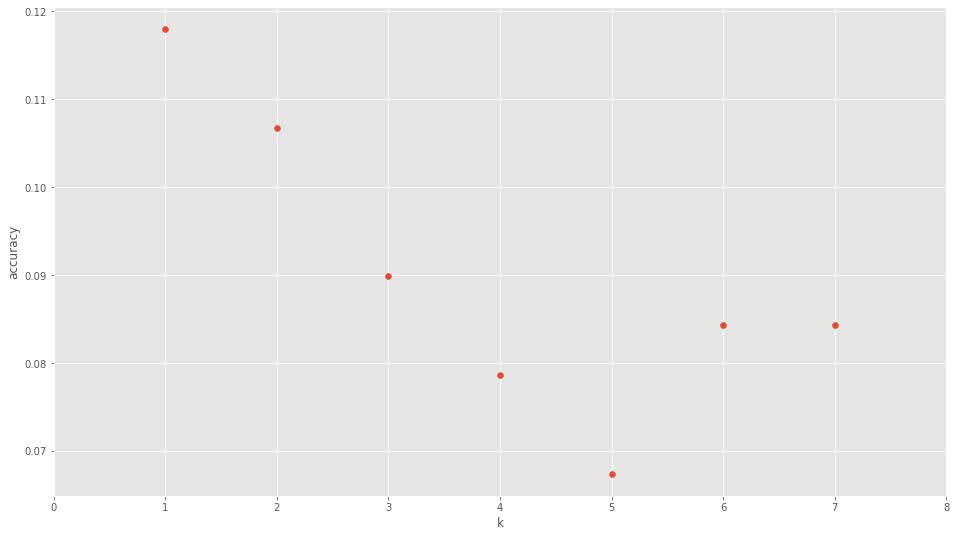

In [15]:
k_range_10_10inst_v2 = range(1, 8)
scores_10_10inst_v2 = []
for k in k_range_10_10inst_v2:
    knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors = k)
    knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
    scores_10_10inst_v2.append(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_10_10inst_v2, scores_10_10inst_v2)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.12


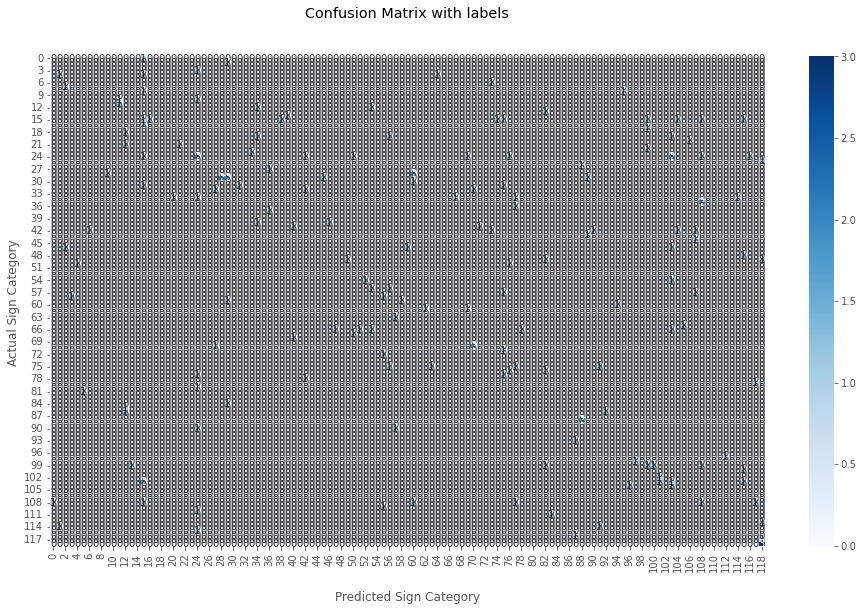

In [16]:
n_neighbors_10_10inst_v2 = 1
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.55
Accuracy of K-NN classifier on test set: 0.11


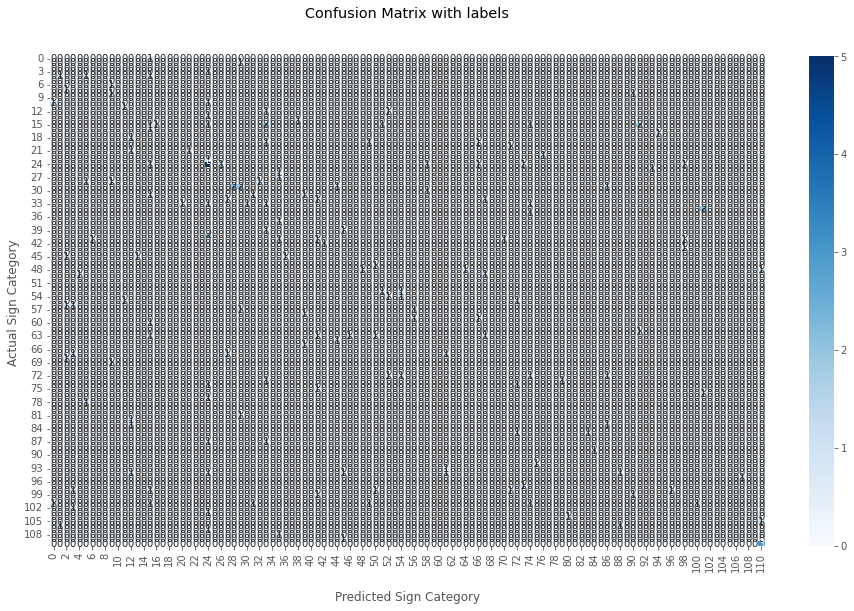

In [17]:
n_neighbors_10_10inst_v2 = 2
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.39
Accuracy of K-NN classifier on test set: 0.09


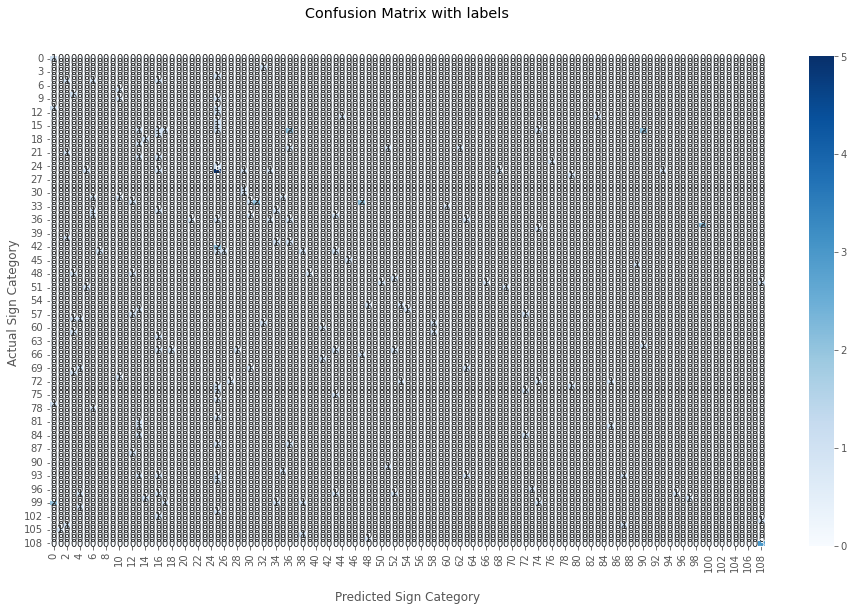

In [18]:
n_neighbors_10_10inst_v2 = 3
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.29
Accuracy of K-NN classifier on test set: 0.07


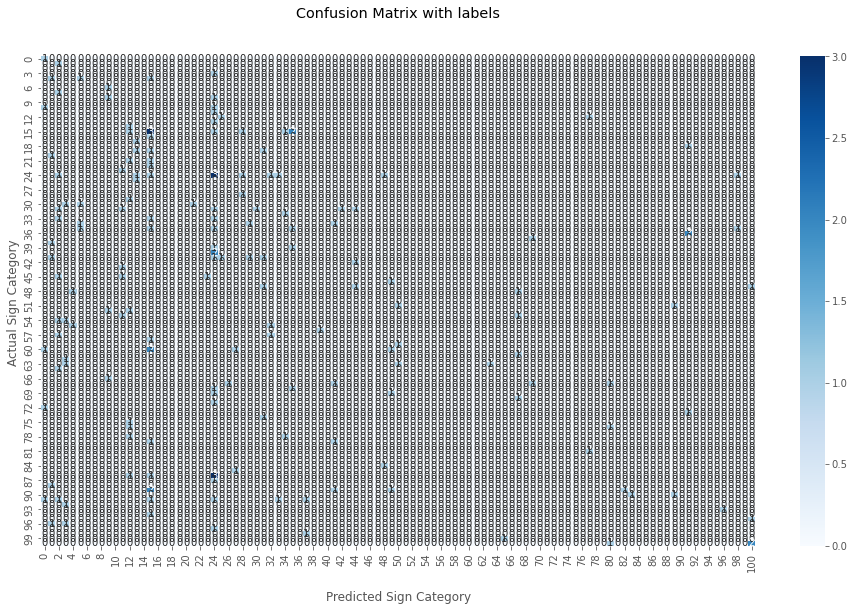

In [19]:
n_neighbors_10_10inst_v2 = 5
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()